In [ ]:
# Separately make each plank area (could use cell rotate, but there is no region rotate.)
# Use a loop to make the planks in each area (translate region)
# Building from out -> in 

"""
A1,A2,A3: refer to different areas 
Outer hexagon: HO
Inner hecagon: HI
Diamond Plank Area: D 
Plank Area: P
Fuel Area: F 
Triso Particles: T
Spacers: S 
Control Rod Slot: CS
Control Rod Arm: CA 
"""

In [ ]:
%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import openmc
import openmc.model
from numpy import sin, cos, tan, pi
import operator

In [ ]:
openmc.__version__

In [ ]:
# Materials 
uoc_9 = openmc.Material()
uoc_9.set_density('g/cc', 11)
uoc_9.add_nuclide('U235', 2.27325e-3)
uoc_9.add_nuclide('U238', 2.269476e-2)
uoc_9.add_nuclide('O16', 3.561871e-2)
uoc_9.add_nuclide('C0',9.79714e-3)
uoc_9.temperature = 1110

"""
uoc_19 = openmc.Material()
uoc_19.set_density('g/cc', 11)
uoc_19.add_nuclide('U235', 4.98781e-3)
uoc_19.add_nuclide('U238', 2.001094e-2)
uoc_19.add_nuclide('O16', 3.566255e-2)
uoc_19.add_nuclide('C12',9.80920e-3)"""

por_c = openmc.Material()
por_c.set_density('g/cc',1)
por_c.add_nuclide('C0',5.013980e-2)
por_c.temperature = 948

si_c = openmc.Material()
si_c.set_density('g/cc', 3.2)
si_c.add_nuclide('Si28', 4.431240e-2)
si_c.add_nuclide('Si29', 2.25887e-3)
si_c.add_nuclide('Si30', 1.48990e-3)
si_c.add_nuclide('C0', 4.806117e-2)
si_c.temperature = 948

graphite = openmc.Material()
graphite.set_density('g/cc', 1.8)
graphite.add_nuclide('C0', 9.025164e-2)
graphite.temperature = 948

p_graphite = openmc.Material()
p_graphite.set_density('g/cc', 1.8)
p_graphite.add_nuclide('C0', 9.025164e-2)
p_graphite.temperature = 948

s_graphite = openmc.Material()
s_graphite.set_density('g/cc', 1.8)
s_graphite.add_nuclide('C0', 9.025164e-2)
s_graphite.temperature = 948

lm_graphite = openmc.Material()
lm_graphite.set_density('g/cc', 1.8)
lm_graphite.add_nuclide('C0', 9.025164e-2)
lm_graphite.temperature = 948

flibe = openmc.Material()
flibe.set_density('g/cc',1.95)
flibe.add_nuclide('Li6',1.383014e-6)
flibe.add_nuclide('Li7',2.37132e-2)
flibe.add_nuclide('Be9',1.18573e-2)
flibe.add_nuclide('F19',4.74291e-2)
flibe.temperature = 948

mhc = openmc.Material()
mhc.set_density('g/cc', 10.28)
mhc.add_nuclide('Mo92', 9.328884e-3)
mhc.add_nuclide('Mo94', 5.850533e-3)
mhc.add_nuclide('Mo95', 1.010836e-2)
mhc.add_nuclide('Mo96', 1.061782e-2)
mhc.add_nuclide('Mo97', 6.102080e-3)
mhc.add_nuclide('Mo98', 1.546981e-2)
mhc.add_nuclide('Mo100', 6.205246e-3)
mhc.add_nuclide('Hf174', 6.659530e-7)
mhc.add_nuclide('Hf176', 2.189321e-5)
mhc.add_nuclide('Hf177', 7.741704e-5)
mhc.add_nuclide('Hf178', 1.135450e-4)
mhc.add_nuclide('Hf179', 5.668925e-5)
mhc.add_nuclide('Hf180', 1.460102e-4)
mhc.add_nuclide('C0', 5.154371e-4)
mhc.temperature = 948

"""
euo_s = openmc.Material()
euo_s.set_density('g/cc',5)
euo_s.add_nuclide('Eu151',8.179510e-3)
euo_s.add_nuclide('Eu153',8.932435e-3)
euo_s.add_nuclide('O16',2.56792e-2)"""

# how to determine wt% of density? 
#euo_p = openmc.Material()
#euo_p.set_density('g/cm3',0.0521)
#euo_p.add_nuclide('Eu151',8.179510e-3)
#euo_p.add_nuclide('Eu153',8.932435e-3)
#euo_p.add_nuclide('O16',2.56792e-2)

mats = openmc.Materials((uoc_9,por_c,si_c,graphite,p_graphite,lm_graphite,flibe,mhc,s_graphite))
mats.export_to_xml()

In [5]:
# constants
H_side = 22.5/np.sin(np.pi/3)

P_len = 23.1 # plank length
P_D_jut = 2-1.4948
P_D_jut_hyp = P_D_jut/sin(pi/3)
P_D_jut_adj = P_D_jut/sin(pi/3)
P_small_gap = 0.35
P_A1_height = 2.55
P_A1_adj = P_A1_height/tan(pi/3)
P_big_gap = 0.7

P_A2_hyp =  P_A1_height/sin(pi/3)
P_big_gap_A2_hyp = P_big_gap/sin(pi/3)
P_A3_hyp = P_A1_height/sin(pi/3)
P_big_gap_A3_hyp = P_big_gap/sin(pi/3)

D_to_center = 2
D_to_center_width = D_to_center*tan(pi/6)
D_A1_width = P_len - 2*(P_D_jut)
D_A1_height = 19.5
D_A1_adj = D_A1_height/np.tan(np.pi/3)

T_pitch = 0.09266

F_protect_gap = 0.1
F_width = T_pitch*(4)
F_len = T_pitch*(210)
F_A1_D_gap = (D_A1_width-F_len)/2
F_F_gap = P_A1_height - 2*F_width -2*F_protect_gap
F_F_gap_adj = F_F_gap/tan(pi/3)
F_A1_width_adj = F_width/tan(pi/3)
F_F_gap_A2_hyp = F_F_gap/sin(pi/3)
F_A2_width_hyp = F_width/sin(pi/3)
F_F_gap_A3_hyp = F_F_gap/sin(pi/3)
F_F_gap_A3_adj = F_F_gap_A3_hyp*cos(pi/3)
F_F_gap_A3_opp = F_F_gap_A3_hyp*sin(pi/3)
F_A3_width_adj = F_width*cos(pi/3)
F_A3_width_opp = F_width*sin(pi/3)

S_S_gap = 14
S_A1_D_gap = (D_A1_width-S_S_gap)/2
S_large_r = 0.7
S_small_r = 0.35

CS_l = 10.38
CS_w = 1.76
CA_l = 10
CA_w = 1 

In [6]:
# top and bottom surfaces (thin dz)
top_surface = openmc.ZPlane(z0=T_pitch/2+4*T_pitch, boundary_type='reflective')
bot_surface = openmc.ZPlane(z0=-(T_pitch/2+4*T_pitch), boundary_type='reflective')

In [7]:
## Outermost Hexagon (only hexagon)
H_cell = openmc.Cell(fill=graphite)
H_cell.region = openmc.model.hexagonal_prism(
    edge_length=H_side,
    orientation = 'x',
    boundary_type='reflective') &-top_surface &+ bot_surface

In [8]:
def plane(m,x,y): 
    return openmc.Plane(a=-m,b=1,d=-m*x+y)

def region_maker(area,area_type):
    if area in ['A1','A3']:
        if V[area][area_type]['L']['m'] == 0.0 and V[area][area_type]['R']['m'] == 0.0: 
            region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                     +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                     +openmc.XPlane(x0=V[area][area_type]['L']['x']) &\
                     -openmc.XPlane(x0=V[area][area_type]['R']['x'])     
        else: 
            region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                     +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                     +plane(V[area][area_type]['L']['m'],V[area][area_type]['L']['x'],V[area][area_type]['L']['y']) &\
                     -plane(V[area][area_type]['R']['m'],V[area][area_type]['R']['x'],V[area][area_type]['R']['y']) 
        
    elif area in ['A2']:
        region = -plane(V[area][area_type]['T']['m'],V[area][area_type]['T']['x'],V[area][area_type]['T']['y']) &\
                 +plane(V[area][area_type]['B']['m'],V[area][area_type]['B']['x'],V[area][area_type]['B']['y']) &\
                 -plane(V[area][area_type]['L']['m'],V[area][area_type]['L']['x'],V[area][area_type]['L']['y']) &\
                 +plane(V[area][area_type]['R']['m'],V[area][area_type]['R']['x'],V[area][area_type]['R']['y']) 
    else: 
        raise Exception('Your region type has yet to be defined.')
    return region 

def rx(x_i,y_i,t):
    return x_i*cos(t)-y_i*sin(t)

def ry(x_i,y_i,t):
    return x_i*sin(t)+y_i*cos(t)

In [9]:
# geometry for planes 

m1 = -D_A1_height/D_A1_adj
m2 = D_A1_width*np.sin(np.pi/3)/(D_A1_width*np.cos(np.pi/3))

V = {'A1':{},'A2':{},'A3':{}}

V['A1'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}
V['A2'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}
V['A3'] = {'D':{'T':{},'B':{},'L':{},'R':{}},
           'P':{'T':{},'B':{},'L':{},'R':{}},
           'F':{'T':{},'B':{},'L':{},'R':{}},
           'S':{'C':{},'Cb':{}},
           'CS':{'T':{},'B':{},'L':{},'R':{}},
           'CA':{'T':{},'B':{},'L':{},'R':{}}}

V['A1']['D']['T'] = {'m':0, 'x':0, 'y':-D_to_center}
V['A1']['D']['B'] = {'m':0, 'x':0, 'y':-D_to_center-D_A1_height}
V['A1']['D']['R'] = {'m':m1, 'x':-D_to_center_width, 'y':-D_to_center}
V['A1']['D']['L'] = {'m':m1, 'x':V['A1']['D']['R']['x']-D_A1_width, 'y':-D_to_center}

V['A1']['P']['T'] = {'m':0, 'x':0, 'y':V['A1']['D']['T']['y']-P_small_gap}
V['A1']['P']['B'] = {'m':0, 'x':0, 'y':V['A1']['P']['T']['y']-P_A1_height}
V['A1']['P']['R'] = {'m':m1, 'x':V['A1']['D']['R']['x']+P_small_gap*tan(pi/6)+P_D_jut_hyp, 'y':V['A1']['D']['R']['y']-P_small_gap}
V['A1']['P']['L'] = {'m':m1, 'x':V['A1']['D']['L']['x']+P_small_gap*tan(pi/6)-P_D_jut_hyp, 'y':V['A1']['D']['L']['y']-P_small_gap}

V['A1']['F']['T'] = {'m':0, 'x':V['A1']['D']['R']['x']-F_A1_D_gap, 'y':V['A1']['P']['T']['y']-F_protect_gap}
V['A1']['F']['B'] = {'m':0, 'x':V['A1']['F']['T']['x'], 'y':V['A1']['F']['T']['y']-F_width}
V['A1']['F']['R'] = {'m':0, 'x':V['A1']['D']['R']['x']-F_A1_D_gap, 'y':V['A1']['F']['T']['y']}
V['A1']['F']['L'] = {'m':0, 'x':V['A1']['D']['L']['x']+F_A1_D_gap, 'y':V['A1']['F']['T']['y']}

V['A1']['S']['C'] = {'x0':-D_to_center_width-S_A1_D_gap,'y0':-D_to_center-P_small_gap}
V['A1']['S']['Cb'] = {'x0':-D_to_center_width-S_A1_D_gap+P_A1_adj,'y0':-D_to_center-P_small_gap-P_A1_height}

V['A1']['CS']['T'] = {'m':0, 'x':0, 'y':CS_w/2}
V['A1']['CS']['B'] = {'m':0, 'x':0, 'y':-CS_w/2}
V['A1']['CS']['R'] = {'m':0, 'x':0, 'y':0}
V['A1']['CS']['L'] = {'m':0, 'x':-CS_l, 'y':0}

V['A1']['CA']['T'] = {'m':0, 'x':0, 'y':CA_w/2}
V['A1']['CA']['B'] = {'m':0, 'x':0, 'y':-CA_w/2}
V['A1']['CA']['R'] = {'m':0, 'x':0, 'y':0}
V['A1']['CA']['L'] = {'m':0, 'x':-CA_l, 'y':0}

A2_t = -pi/3*2
V['A2']['D']['T'] = {'m':0, 'x':rx(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A2_t), 'y':ry(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A2_t)}
V['A2']['D']['B'] = {'m':0, 'x':rx(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A2_t), 'y':ry(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A2_t)}
V['A2']['D']['R'] = {'m':m2, 'x':rx(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A2_t), 'y':ry(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A2_t)}
V['A2']['D']['L'] = {'m':m2, 'x':rx(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A2_t), 'y':ry(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A2_t)}

V['A2']['P']['T'] = {'m':0, 'x':rx(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A2_t), 'y':ry(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A2_t)}
V['A2']['P']['B'] = {'m':0, 'x':rx(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A2_t), 'y':ry(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A2_t)}
V['A2']['P']['R'] = {'m':m2, 'x':rx(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A2_t), 'y':ry(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A2_t)}
V['A2']['P']['L'] = {'m':m2, 'x':rx(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A2_t), 'y':ry(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A2_t)}

V['A2']['F']['T'] = {'m':-1/m2, 'x':rx(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A2_t), 'y':ry(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A2_t)}
V['A2']['F']['B'] = {'m':-1/m2, 'x':rx(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A2_t), 'y':ry(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A2_t)}
V['A2']['F']['R'] = {'m':m2, 'x':rx(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A2_t), 'y':ry(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A2_t)}
V['A2']['F']['L'] = {'m':m2, 'x':rx(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A2_t), 'y':ry(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A2_t)}

V['A2']['S']['C'] = {'x0':rx(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A2_t),'y0':ry(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A2_t)}
V['A2']['S']['Cb'] = {'x0':rx(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A2_t),'y0':ry(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A2_t)}

V['A2']['CS']['T'] = {'m':-1/m2, 'x':rx(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A2_t), 'y':ry(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A2_t)}
V['A2']['CS']['B'] = {'m':-1/m2, 'x':rx(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A2_t), 'y':ry(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A2_t)}
V['A2']['CS']['R'] = {'m':m2, 'x':rx(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A2_t), 'y':ry(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A2_t)}
V['A2']['CS']['L'] = {'m':m2, 'x':rx(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A2_t), 'y':ry(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A2_t)}

V['A2']['CA']['T'] = {'m':-1/m2, 'x':rx(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A2_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A2_t)}
V['A2']['CA']['B'] = {'m':-1/m2, 'x':rx(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A2_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A2_t)}
V['A2']['CA']['R'] = {'m':m2, 'x':rx(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A2_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A2_t)}
V['A2']['CA']['L'] = {'m':m2, 'x':rx(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A2_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A2_t)}

A3_t = pi/3*2
V['A3']['D']['T'] = {'m':m2, 'x':rx(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A3_t), 'y':ry(V['A1']['D']['R']['x'],V['A1']['D']['R']['y'],A3_t)}
V['A3']['D']['B'] = {'m':m2, 'x':rx(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A3_t), 'y':ry(V['A1']['D']['L']['x'],V['A1']['D']['L']['y'],A3_t)}
V['A3']['D']['R'] = {'m':m1, 'x':rx(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A3_t), 'y':ry(V['A1']['D']['B']['x'],V['A1']['D']['B']['y'],A3_t)}
V['A3']['D']['L'] = {'m':m1, 'x':rx(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A3_t), 'y':ry(V['A1']['D']['T']['x'],V['A1']['D']['T']['y'],A3_t)}

V['A3']['P']['T'] = {'m':m2, 'x':rx(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A3_t), 'y':ry(V['A1']['P']['R']['x'],V['A1']['P']['R']['y'],A3_t)}
V['A3']['P']['B'] = {'m':m2, 'x':rx(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A3_t), 'y':ry(V['A1']['P']['L']['x'],V['A1']['P']['L']['y'],A3_t)}
V['A3']['P']['R'] = {'m':m1, 'x':rx(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A3_t), 'y':ry(V['A1']['P']['B']['x'],V['A1']['P']['B']['y'],A3_t)}
V['A3']['P']['L'] = {'m':m1, 'x':rx(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A3_t), 'y':ry(V['A1']['P']['T']['x'],V['A1']['P']['T']['y'],A3_t)}

V['A3']['F']['T'] = {'m':-1/m1, 'x':rx(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A3_t), 'y':ry(V['A1']['F']['R']['x'],V['A1']['F']['R']['y'],A3_t)}
V['A3']['F']['B'] = {'m':-1/m1, 'x':rx(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A3_t), 'y':ry(V['A1']['F']['L']['x'],V['A1']['F']['L']['y'],A3_t)}
V['A3']['F']['R'] = {'m':m1, 'x':rx(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A3_t), 'y':ry(V['A1']['F']['B']['x'],V['A1']['F']['B']['y'],A3_t)}
V['A3']['F']['L'] = {'m':m1, 'x':rx(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A3_t), 'y':ry(V['A1']['F']['T']['x'],V['A1']['F']['T']['y'],A3_t)}

V['A3']['S']['C'] = {'x0':rx(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A3_t),'y0':ry(V['A1']['S']['C']['x0'],V['A1']['S']['C']['y0'],A3_t)}
V['A3']['S']['Cb'] = {'x0':rx(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A3_t),'y0':ry(V['A1']['S']['Cb']['x0'],V['A1']['S']['Cb']['y0'],A3_t)}

V['A3']['CS']['T'] = {'m':-1/m1, 'x':rx(V['A1']['CS']['R']['x'],V['A1']['CS']['R']['y'],A3_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t)}
V['A3']['CS']['B'] = {'m':-1/m1, 'x':rx(V['A1']['CS']['L']['x'],V['A1']['CS']['L']['y'],A3_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t)}
V['A3']['CS']['R'] = {'m':m1, 'x':rx(V['A1']['CS']['B']['x'],V['A1']['CS']['B']['y'],A3_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t)}
V['A3']['CS']['L'] = {'m':m1, 'x':rx(V['A1']['CS']['T']['x'],V['A1']['CS']['T']['y'],A3_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t)}

V['A3']['CA']['T'] = {'m':-1/m1, 'x':rx(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t), 'y':ry(V['A1']['CA']['R']['x'],V['A1']['CA']['R']['y'],A3_t)}
V['A3']['CA']['B'] = {'m':-1/m1, 'x':rx(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t), 'y':ry(V['A1']['CA']['L']['x'],V['A1']['CA']['L']['y'],A3_t)}
V['A3']['CA']['R'] = {'m':m1, 'x':rx(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t), 'y':ry(V['A1']['CA']['B']['x'],V['A1']['CA']['B']['y'],A3_t)}
V['A3']['CA']['L'] = {'m':m1, 'x':rx(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t), 'y':ry(V['A1']['CA']['T']['x'],V['A1']['CA']['T']['y'],A3_t)}


In [10]:
# Diamond Plank Area
A1_D_cell = openmc.Cell(fill=flibe)
A1_D_cell.region = region_maker('A1','D') &-top_surface &+ bot_surface

A2_D_cell = openmc.Cell(fill=flibe)
A2_D_cell.region = region_maker('A2','D') &-top_surface &+ bot_surface

A3_D_cell = openmc.Cell(fill=flibe)
A3_D_cell.region = region_maker('A3','D') &-top_surface &+ bot_surface

D_regions = A1_D_cell.region | A2_D_cell.region | A3_D_cell.region 
D_universe = openmc.Universe(cells=(A1_D_cell,A2_D_cell,A3_D_cell,))
D_areas = openmc.Cell(fill=D_universe,region=D_regions)
H_cell.region &= ~D_regions

In [11]:
# Graphite Planks 
all_P_univ = openmc.Universe()
all_P_regions = region_maker('A1','P') # initialize
T = {'A1':{'P':{},'F':{},'S':{}},'A2':{'P':{},'F':{},'S':{}},'A3':{'P':{},'F':{},'S':{}}}
T['A1']['P'] = {'x':(P_big_gap+P_A1_height)/tan(pi/3),'y':-(P_big_gap+P_A1_height)}
T['A2']['P'] = {'x':-P_A2_hyp-P_big_gap_A2_hyp, 'y':0}
T['A3']['P'] = {'x':(P_A3_hyp+P_big_gap_A3_hyp)*cos(pi/3), 'y':(P_A3_hyp+P_big_gap_A3_hyp)*sin(pi/3)}

for area in range(3):
    area_str = 'A{}'.format(area+1)
    P_region = region_maker(area_str,'P')
    P_cell = openmc.Cell(fill=p_graphite,region=P_region)
    P_univ = openmc.Universe(cells=(P_cell,))
    for trans in range(6):
        P_region_new = P_region.translate((trans*T[area_str]['P']['x'],trans*T[area_str]['P']['y'],0))
        P_cell_new = openmc.Cell(fill=P_univ,region=P_region_new)
        P_cell_new.translation = (trans*T[area_str]['P']['x'],trans*T[area_str]['P']['y'],0)
        all_P_univ.add_cell(P_cell_new)
        all_P_regions |= P_region_new
        D_areas.region &= ~P_region_new
        H_cell.region &= ~P_region_new
P_areas = openmc.Cell(fill=all_P_univ,region=all_P_regions&-top_surface &+ bot_surface)

In [12]:
# Triso Particles 
spheres = [openmc.Sphere(r=1e-5*r)
           for r in [2135., 3135., 3485., 3835., 4235,]]
triso_cells = [openmc.Cell(fill=uoc_9, region=-spheres[0]),
         openmc.Cell(fill=por_c, region=+spheres[0] & -spheres[1]),
         openmc.Cell(fill=graphite, region=+spheres[1] & -spheres[2]),
         openmc.Cell(fill=si_c, region=+spheres[2] & -spheres[3]),
         openmc.Cell(fill=graphite, region=+spheres[3] &-spheres[4]),
         openmc.Cell(fill=lm_graphite, region=+spheres[4])]
triso_univ = openmc.Universe(cells=triso_cells)
lm_graphite_cell = openmc.Cell(fill=lm_graphite)
lm_graphite_univ = openmc.Universe(cells=(lm_graphite_cell,))

u = triso_univ
lattice = openmc.RectLattice()
lattice.lower_left = (V['A1']['F']['L']['x'], V['A1']['F']['B']['y'],-(T_pitch/2+4*T_pitch))
lattice.pitch = (T_pitch, T_pitch,T_pitch)
lattice.outer = lm_graphite_univ
lattice_list = []
for z in range(9): 
    lattice_z_list = []
    for row in range(4):
        lattice_y_list = []
        for col in range(210):
            lattice_y_list.append(u)
        lattice_z_list.append(lattice_y_list)
    lattice_list.append(lattice_z_list)
        
lattice.universes = lattice_list

In [13]:
# Fuel Plank 
all_F_univ = openmc.Universe()
all_F_regions = region_maker('A1','F') # initialize
T['A1']['F'] = {'x':F_F_gap_adj+F_A1_width_adj, 'y':-F_F_gap-F_width}
T['A2']['F'] = {'x':-F_F_gap_A2_hyp-F_A2_width_hyp, 'y':0}
T['A3']['F'] = {'x':F_F_gap_A3_adj+F_A3_width_adj, 'y':F_F_gap_A3_opp+F_A3_width_opp}

for area in range(3): 
    area_str = 'A{}'.format(area+1)
    F_region = region_maker(area_str,'F')
    F_cell = openmc.Cell(fill=lm_graphite,)
    F_cell.fill = lattice
    F_univ = openmc.Universe(cells=(F_cell,))
    for t in range(6):
        for x in range(2):
            x_trans = t*T[area_str]['P']['x']
            y_trans = t*T[area_str]['P']['y']
            if x == 1:
                x_trans += T[area_str]['F']['x']
                y_trans += T[area_str]['F']['y']
            F_region_new = F_region.translate((x_trans,y_trans,0))
            F_cell_new = openmc.Cell(fill=F_univ,region=F_region_new)
            if area == 1: 
                F_cell_new.rotation = (0,0,-120)
            if area == 2: 
                F_cell_new.rotation = (0,0,120)
            F_cell_new.translation = (x_trans,y_trans,0)
            all_F_univ.add_cell(F_cell_new)
            all_F_regions |= F_region_new
            P_areas.region &= ~F_region_new 
            D_areas.region &= ~F_region_new
            H_cell.region &= ~F_region_new 
F_areas = openmc.Cell(fill=all_F_univ,region=all_F_regions&-top_surface &+ bot_surface)

In [14]:
# Spacer 
all_S_univ = openmc.Universe()
S_small_spacer_surf = openmc.ZCylinder(r=S_small_r,x0=-D_to_center_width-S_A1_D_gap,y0=-D_to_center-P_small_gap) # initialize 
all_S_regions = -S_small_spacer_surf & +plane(V['A1']['P']['T']['m'],V['A1']['P']['T']['x'],V['A1']['P']['T']['y'])
T['A1']['S'] = {'x':-S_S_gap, 'y':0}
T['A2']['S'] = {'x':S_S_gap*cos(pi/3), 'y':S_S_gap*sin(pi/3)}
T['A3']['S'] = {'x':S_S_gap*cos(pi/3), 'y':-S_S_gap*sin(pi/3)}

# outer loop is for 3 types of spacers, small top, big middle, small bottom 
rad = [S_small_r, S_large_r,S_small_r] 
start = [0,1,5]
end = [1,6,6]
C = ['C','C','Cb']
for y in range(3):      
    for area in range(3):
        area_str = 'A{}'.format(area+1)
        S_cylinder = openmc.ZCylinder(r=rad[y],x0=V[area_str]['S'][C[y]]['x0'],y0=V[area_str]['S'][C[y]]['y0']) 
        if area == 0:
            S_region = -S_cylinder & +plane(V[area_str]['P']['T']['m'],V[area_str]['P']['T']['x'],V[area_str]['P']['T']['y'])
            if y == 2: 
                S_region = -S_cylinder & -plane(V[area_str]['P']['B']['m'],V[area_str]['P']['B']['x'],V[area_str]['P']['B']['y'])
        if area == 1:
            S_region = -S_cylinder & -plane(V[area_str]['P']['R']['m'],V[area_str]['P']['R']['x'],V[area_str]['P']['R']['y'])   
            if y == 2: 
                S_region = -S_cylinder & +plane(V[area_str]['P']['L']['m'],V[area_str]['P']['L']['x'],V[area_str]['P']['L']['y'])
        if area == 2:
            S_region = -S_cylinder & -plane(V[area_str]['P']['L']['m'],V[area_str]['P']['L']['x'],V[area_str]['P']['L']['y'])     
            if y == 2: 
                S_region = -S_cylinder & +plane(V[area_str]['P']['R']['m'],V[area_str]['P']['R']['x'],V[area_str]['P']['R']['y'])
        S_cell = openmc.Cell(fill=s_graphite,region=S_region)
        S_univ = openmc.Universe(cells=(S_cell,))
        for trans in range(start[y],end[y]):
            for x in range(2):
                x_trans = trans*T[area_str]['P']['x']
                y_trans = trans*T[area_str]['P']['y']
                if x == 1:
                    x_trans += T[area_str]['S']['x']
                    y_trans += T[area_str]['S']['y']
                S_region_new = S_region.translate((x_trans,y_trans,0))
                S_cell_new = openmc.Cell(fill=S_univ,region=S_region_new)
                S_cell_new.translation = (x_trans,y_trans,0)
                all_S_univ.add_cell(S_cell_new)
                all_S_regions |= S_region_new
                F_areas.region &= ~S_region_new
                P_areas.region &= ~S_region_new
                D_areas.region &= ~S_region_new
                H_cell.region &= ~S_region_new
S_areas = openmc.Cell(fill=all_S_univ,region=all_S_regions&-top_surface &+ bot_surface)

In [15]:
# Control Rod Slot 

A1_CS_cell = openmc.Cell(fill=flibe)
A1_CS_cell.region = region_maker('A1','CS') &-top_surface &+ bot_surface

A2_CS_cell = openmc.Cell(fill=flibe)
A2_CS_cell.region = region_maker('A2','CS') &-top_surface &+ bot_surface

A3_CS_cell = openmc.Cell(fill=flibe)
A3_CS_cell.region = region_maker('A3','CS') &-top_surface &+ bot_surface

CS_regions = A1_CS_cell.region | A2_CS_cell.region | A3_CS_cell.region 
CS_universe = openmc.Universe(cells=(A1_CS_cell,A2_CS_cell,A3_CS_cell,))
CS_areas = openmc.Cell(fill=CS_universe,region=CS_regions)
S_areas.region &= ~CS_regions 
F_areas.region &= ~CS_regions 
P_areas.region &= ~CS_regions 
D_areas.region &= ~CS_regions 
H_cell.region &= ~CS_regions 

In [16]:
# Control Rod Arm
A1_CA_cell = openmc.Cell(fill=flibe)
A1_CA_cell.region = region_maker('A1','CA') &-top_surface &+ bot_surface

A2_CA_cell = openmc.Cell(fill=flibe)
A2_CA_cell.region = region_maker('A2','CA') &-top_surface &+ bot_surface

A3_CA_cell = openmc.Cell(fill=flibe)
A3_CA_cell.region = region_maker('A3','CA') &-top_surface &+ bot_surface

CA_regions = A1_CA_cell.region | A2_CA_cell.region | A3_CA_cell.region 
CA_universe = openmc.Universe(cells=(A1_CA_cell,A2_CA_cell,A3_CA_cell,))
CA_areas = openmc.Cell(fill=CA_universe,region=CA_regions)
CS_areas.region &= ~CA_regions
S_areas.region &= ~CA_regions 
F_areas.region &= ~CA_regions 
P_areas.region &= ~CA_regions 
D_areas.region &= ~CA_regions 
H_cell.region &= ~CA_regions 

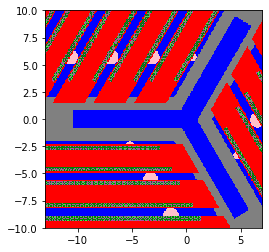

In [17]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(20, 20), basis='xy', color_by = 'material',
    pixels = (300,300),
    origin = (-3,0,0),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('c1a_control_rods.png')

In [ ]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(60, 60), basis='xy', color_by = 'material',
    pixels = (1000,1000),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('fhr_assembly_2D.png')

In [ ]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(20, 20), basis='xy', color_by = 'material',
    pixels = (300,300),
    origin = (-10,-10,0),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('c1a_A1.png')

In [ ]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(22, 8), basis='xy', color_by = 'material',
    pixels = (300,300),
    origin = (-10,-5,0),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('c1a_A1_P12.png')

In [ ]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(5, 5), basis='xy', color_by = 'material',
    pixels = (300,300),
    origin = (-18,-3,0),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('c1a_A1_P1.png')

In [ ]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(1, 1), basis='xy', color_by = 'material',
    pixels = (300,300),
    origin = (-19,-2.5,0),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('c1a_A1_P1_triso.png')

In [ ]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(0.5, 0.5), basis='xy', color_by = 'material',
    pixels = (300,300),
    origin = (-19,-2.5,0),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('c1a_A1_P1_triso2.png')

In [ ]:
# Plotting 
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
root.plot(width=(1, 1), basis='xz', color_by = 'material',
    pixels = (300,300),
    origin = (-19,-2.5,0),
    colors = {
    graphite: 'grey', 
    p_graphite:'red',
    flibe: 'blue',
    lm_graphite: 'green',
    s_graphite: 'pink'
})
plt.savefig('c1a_A1_P1_triso_xz.png')

In [ ]:
root = openmc.Universe(cells=[H_cell,D_areas,P_areas,F_areas,S_areas,CS_areas,CA_areas])
geom = openmc.Geometry(root)
geom.export_to_xml()
point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
#settings.source = src
settings.batches = 500
settings.inactive = 100
settings.particles = 200000
settings.temperature = {'multipole':True,'method':'interpolation'}
settings.export_to_xml()

In [ ]:
openmc.run()